In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('boston_housing.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


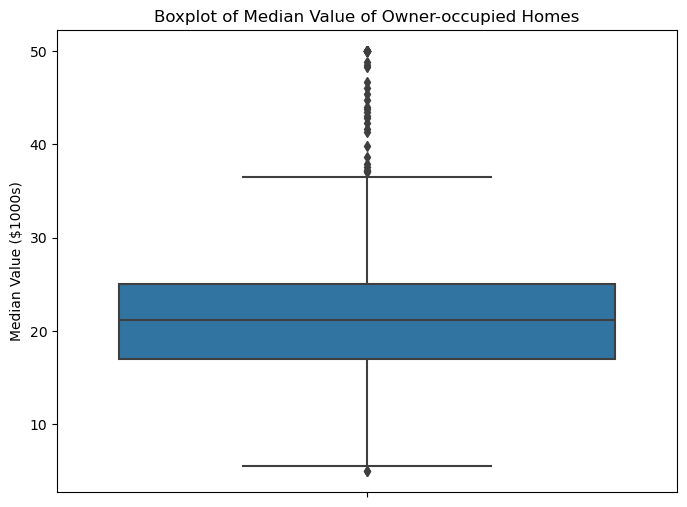

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=df)
plt.title('Boxplot of Median Value of Owner-occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

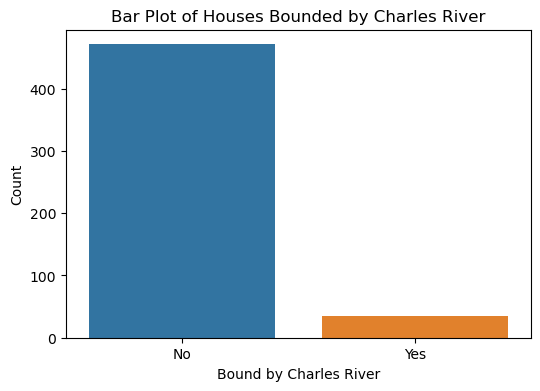

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Houses Bounded by Charles River')
plt.xlabel('Bound by Charles River')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

C:\Users\20330191\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


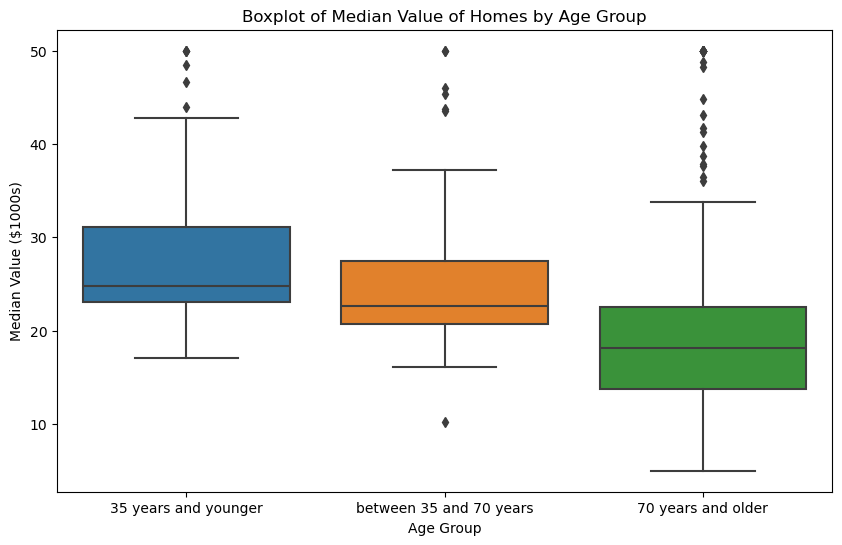

In [9]:
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, max(df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

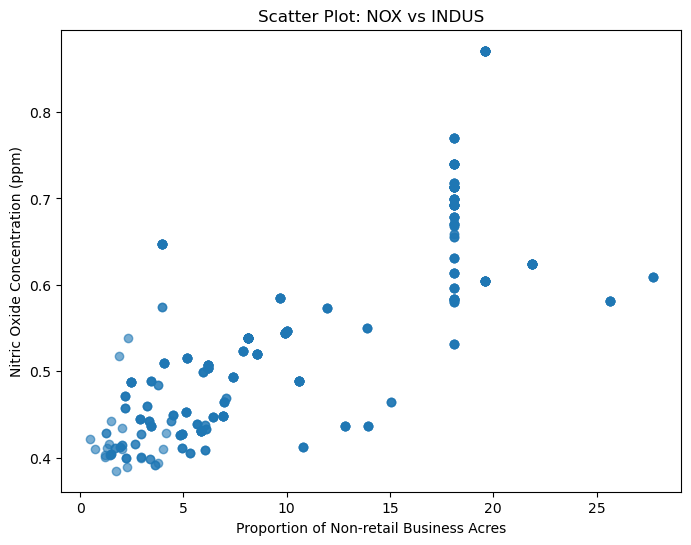

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['INDUS'], df['NOX'], alpha=0.6)
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres')
plt.ylabel('Nitric Oxide Concentration (ppm)')
plt.show()

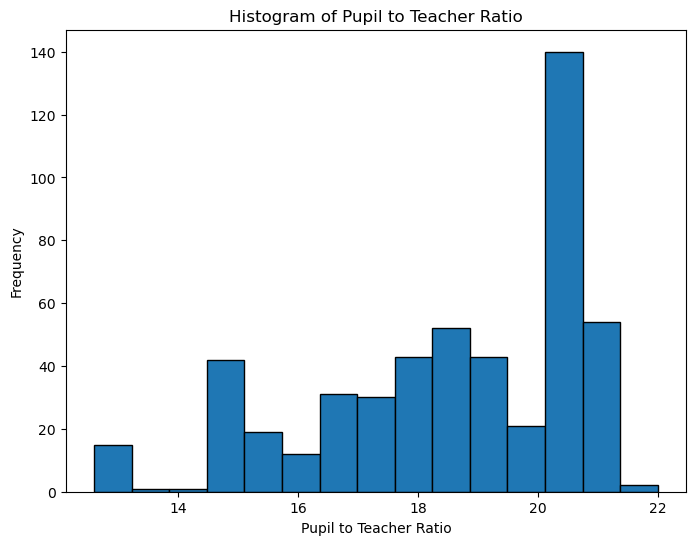

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['PTRATIO'], bins=15, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [12]:
from scipy import stats

# Separate data for houses bounded and not bounded by the Charles river
bound = df[df['CHAS'] == 1]['MEDV']
not_bound = df[df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(bound, not_bound)

print(f"T-test Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test Statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [13]:
from scipy import stats

# Discretize AGE variable into three groups
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, max(df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Perform ANOVA
grouped_data = [group['MEDV'] for name, group in df.groupby('AGE_group')]
f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


C:\Users\20330191\AppData\Local\Temp\ipykernel_19824\2302701162.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group['MEDV'] for name, group in df.groupby('AGE_group')]


In [14]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(df['INDUS'], df['NOX'])

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98


In [15]:
import statsmodels.api as sm

# Define X and y
X = df['DIS']  # Weighted distance to employment centers
y = df['MEDV']  # Median value of owner-occupied homes

# Add a constant to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        15:38:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0